###Step 1: Loading the Dataset


The first step in our fraud detection project involves loading the dataset. The dataset is stored on Google Drive and contains transaction details for detecting fraudulent activities. We will mount the Google Drive to access the dataset and load it into a pandas DataFrame for further analysis. Displaying the first few rows of the dataset will help confirm that it has been loaded correctly and provide a quick overview of its structure.



In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# File path in your Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/Final_Project/creditcard.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(data.head())


Mounted at /content/drive
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

      

###Step 2: Understanding Class Distribution and Imbalance


Fraudulent transactions are typically a very small fraction of the overall dataset, leading to a severe class imbalance. This step involves checking the distribution of the target variable (Class) to quantify the imbalance. A bar plot is also generated to visualize the disparity between non-fraudulent and fraudulent transactions, providing a clear representation of the challenge our machine learning model will need to address.



Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


<ipython-input-2-8354d2899368>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


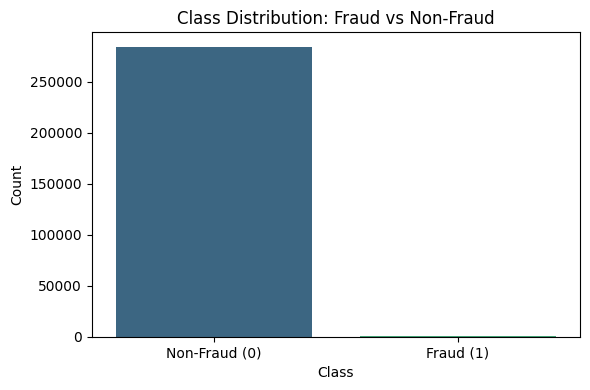

In [ ]:
# Check the class distribution
class_distribution = data['Class'].value_counts()
print("Class Distribution:\n", class_distribution)

# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.xlabel("Class")
plt.tight_layout()
plt.show()


In [ ]:
# Basic statistics for numerical features
print(data.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

### Step 3: Feature Scaling

The features `Amount` and `Time` in the dataset have different scales, which can negatively impact the performance of machine learning algorithms. To address this, we apply feature scaling using `StandardScaler` to standardize these features. This ensures that all features contribute equally to the model's learning process. After scaling, the original columns are dropped, and the updated dataset is displayed to verify the transformation.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaled versions of 'Amount' and 'Time'
scaler = StandardScaler()
data['Amount_scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time_scaled'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Drop the original 'Amount' and 'Time' columns
data_scaled = data.drop(['Amount', 'Time'], axis=1)

# Display the updated dataset
print(data_scaled.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  Amount_scaled  Time_scaled  

### Step 4: Splitting the Data

To evaluate the model's performance effectively, the dataset is split into training and testing sets. The training set is used to train the machine learning model, while the testing set is reserved for evaluating its performance on unseen data. The `stratify` parameter ensures that the class distribution remains consistent across both sets, preserving the original imbalance.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the splits
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (199364, 30)
Testing set size: (85443, 30)


### Step 5: Balancing the Dataset with Borderline-SMOTE

Due to the severe class imbalance in the dataset, oversampling is applied to the training data using Borderline-SMOTE. This technique generates synthetic samples near the decision boundary, focusing on the most challenging cases for classification. This step ensures that the model is trained on a balanced dataset, improving its ability to detect fraudulent transactions. The updated class distribution is displayed to confirm the balancing process.

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply Borderline-SMOTE to the training data
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')  # You can use 'borderline-1' or 'borderline-2'
X_train_balanced, y_train_balanced = borderline_smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after Borderline-SMOTE:\n", pd.Series(y_train_balanced).value_counts())



Class distribution after Borderline-SMOTE:
 Class
0    199020
1    199020
Name: count, dtype: int64


### Step 6: Visualizing the Balanced Dataset with PCA

To gain insights into the effectiveness of the balancing process, Principal Component Analysis (PCA) is applied to reduce the high-dimensional data to two dimensions for visualization. This allows for a clear representation of how the synthetic samples generated by Borderline-SMOTE separate fraudulent and non-fraudulent transactions. The scatter plot highlights the improved class separability, particularly for challenging borderline cases.


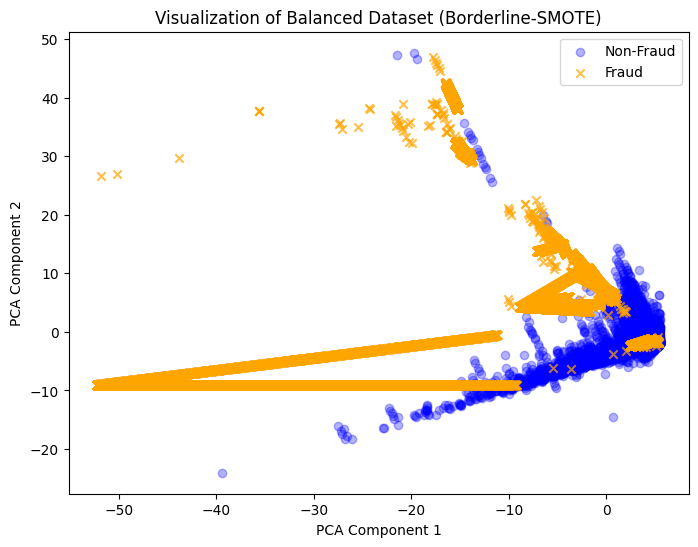

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_balanced)

# Plot the balanced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_train_balanced == 0, 0], X_pca[y_train_balanced == 0, 1], alpha=0.3, label="Non-Fraud", marker='o', color='blue')
plt.scatter(X_pca[y_train_balanced == 1, 0], X_pca[y_train_balanced == 1, 1], alpha=0.7, label="Fraud", marker='x', color='orange')
plt.title("Visualization of Balanced Dataset (Borderline-SMOTE)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()



### Step 7: Training the Cost-Sensitive Logistic Regression Model

To address the remaining class imbalance, Logistic Regression is trained using Stochastic Gradient Descent (SGD) with cost-sensitive learning. The `class_weight` parameter assigns a higher penalty for misclassifying fraudulent transactions, ensuring the model remains sensitive to minority cases. After training the model on the balanced dataset, predictions are made on the test set. The model's performance is evaluated using a classification report and the ROC AUC score, which measure its effectiveness in distinguishing fraudulent from non-fraudulent transactions.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression with class weights to handle imbalance
log_reg_cost_sensitive = SGDClassifier(
    loss='log_loss', penalty='l2', class_weight={0: 1, 1: 10}, random_state=42
)
log_reg_cost_sensitive.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_cost_sensitive = log_reg_cost_sensitive.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred_cost_sensitive))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg_cost_sensitive.decision_function(X_test)))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.13      0.83      0.22       148

    accuracy                           0.99     85443
   macro avg       0.56      0.91      0.61     85443
weighted avg       1.00      0.99      0.99     85443

ROC AUC Score: 0.9442744021939755


### Step 8: Optimizing the Decision Threshold with Precision-Recall Curve

The default decision threshold (0.5) may not yield the best balance between precision and recall, especially in imbalanced datasets. To optimize performance, a Precision-Recall Curve is computed using the model's decision scores. The threshold that maximizes the F1-Score is identified as the optimal threshold. Predictions are then adjusted based on this threshold, and the model's performance is re-evaluated using a classification report to assess the impact of threshold tuning.

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get decision scores
y_scores = log_reg_cost_sensitive.decision_function(X_test)

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find optimal threshold (maximize F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Precision: {precision[optimal_idx]:.2f}, Recall: {recall[optimal_idx]:.2f}, F1-Score: {f1_scores[optimal_idx]:.2f}")

# Adjust predictions with the optimal threshold
y_pred_adjusted = (y_scores > optimal_threshold).astype(int)

# Re-evaluate model with adjusted threshold
print("Classification Report (Adjusted Threshold):\n", classification_report(y_test, y_pred_adjusted))


Optimal Threshold: 62.14
Precision: 0.76, Recall: 0.71, F1-Score: 0.73
Classification Report (Adjusted Threshold):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.70      0.73       148

    accuracy                           1.00     85443
   macro avg       0.88      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



### Step 9: Evaluating Different Class Weights

Class weights play a critical role in handling imbalanced datasets by assigning higher penalties to misclassified minority class instances. This step tests multiple weight configurations (\{0: 1, 1: 5\}, \{0: 1, 1: 10\}, \{0: 1, 1: 20\}) to evaluate their impact on model performance. For each configuration, the model is trained, the Precision-Recall Curve is computed, and the optimal threshold is identified. Predictions are adjusted using the optimal threshold, and the resulting metrics (Precision, Recall, and F1-Score) are recorded for comparison. This process highlights the trade-offs between different class weight strategies and helps identify the most balanced configuration.

In [ ]:
# Test multiple weight configurations
weights = [{0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 20}]
results = []

for weight in weights:
    # Train Logistic Regression with different class weights
    log_reg = SGDClassifier(loss='log_loss', penalty='l2', class_weight=weight, random_state=42)
    log_reg.fit(X_train_balanced, y_train_balanced)

    # Predict and evaluate
    y_scores = log_reg.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

    # Find optimal threshold
    optimal_idx = f1_scores.argmax()
    optimal_threshold = thresholds[optimal_idx]

    # Adjust predictions with optimal threshold
    y_pred_adjusted = (y_scores > optimal_threshold).astype(int)
    report = classification_report(y_test, y_pred_adjusted, output_dict=True)

    # Store results
    results.append({
        'weights': weight,
        'optimal_threshold': optimal_threshold,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1_score': report['1']['f1-score']
    })

# Display results
for res in results:
    print(f"Class Weights: {res['weights']}")
    print(f"  Optimal Threshold: {res['optimal_threshold']:.2f}")
    print(f"  Precision: {res['precision']:.2f}, Recall: {res['recall']:.2f}, F1-Score: {res['f1_score']:.2f}")
    print("-" * 50)


Class Weights: {0: 1, 1: 5}
  Optimal Threshold: 43.54
  Precision: 0.72, Recall: 0.69, F1-Score: 0.70
--------------------------------------------------
Class Weights: {0: 1, 1: 10}
  Optimal Threshold: 62.14
  Precision: 0.76, Recall: 0.70, F1-Score: 0.73
--------------------------------------------------
Class Weights: {0: 1, 1: 20}
  Optimal Threshold: 100.07
  Precision: 0.75, Recall: 0.72, F1-Score: 0.73
--------------------------------------------------


### Step 10: Visualizing Precision-Recall Curves for Different Class Weights

To compare the effectiveness of various class weight configurations, Precision-Recall Curves are plotted for each weight. These curves illustrate the trade-off between precision and recall for the corresponding models. By visualizing these curves, we can identify the configuration that achieves the best balance between precision and recall, aiding in the selection of the optimal class weights for the model.

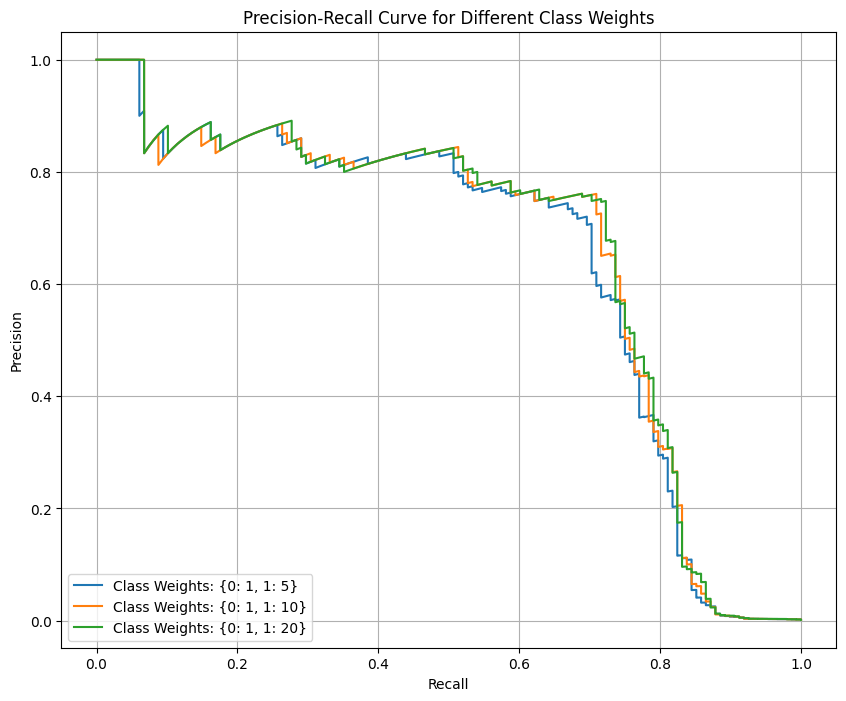

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall Curves for different weights
plt.figure(figsize=(10, 8))

for weight in weights:
    # Train Logistic Regression
    log_reg = SGDClassifier(loss='log_loss', penalty='l2', class_weight=weight, random_state=42)
    log_reg.fit(X_train_balanced, y_train_balanced)

    # Predict and compute Precision-Recall curve
    y_scores = log_reg.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    # Plot the curve
    plt.plot(recall, precision, label=f"Class Weights: {weight}")

plt.title("Precision-Recall Curve for Different Class Weights")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid()
plt.show()


### Step 11: Analyzing the Confusion Matrix for the Final Model

The Confusion Matrix provides a detailed breakdown of the model's predictions, categorizing them into True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). For the final model, the optimal class weights (\{0: 1, 1: 10\}) and threshold (62.14) are used to generate predictions. By plotting the Confusion Matrix, we can visually assess the model's performance, including its ability to minimize false negatives (missed fraud cases) and false positives (incorrectly flagged legitimate transactions). This analysis is crucial for evaluating the practical effectiveness of the model.

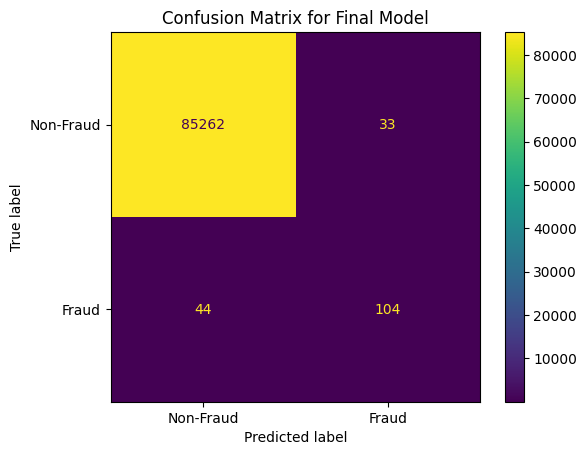

True Negatives (TN): 85262
False Positives (FP): 33
False Negatives (FN): 44
True Positives (TP): 104


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate predictions using the finalized model
log_reg_final = SGDClassifier(loss='log_loss', penalty='l2', class_weight={0: 1, 1: 10}, random_state=42)
log_reg_final.fit(X_train_balanced, y_train_balanced)

# Use the optimal threshold determined earlier
y_scores_final = log_reg_final.decision_function(X_test)
optimal_threshold = 62.14  # From the earlier results
y_pred_final = (y_scores_final > optimal_threshold).astype(int)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, display_labels=["Non-Fraud", "Fraud"], cmap="viridis")
plt.title("Confusion Matrix for Final Model")
plt.show()

# Print counts of False Positives and False Negatives
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


<Figure size 800x600 with 0 Axes>

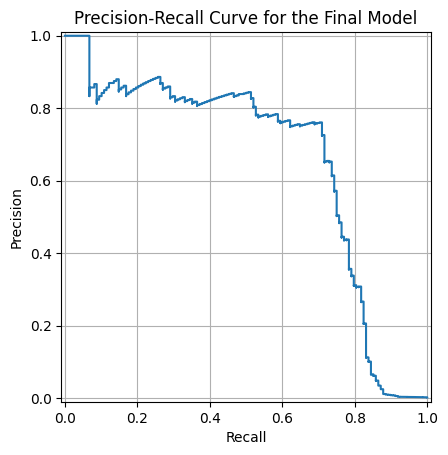

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Compute Precision-Recall values for the final model
y_scores_final = log_reg_final.decision_function(X_test)  # Assuming log_reg_final is the final trained model
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_final)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title("Precision-Recall Curve for the Final Model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.savefig("precision_recall_curve.png")  # Save the image
plt.show()
